In [45]:
"""
Python 3.10 Best models Spaceship_Titanic program will you survive on the spaceship titanic or not
File name Titanic_eda.py

Version: 0.1
Author: MLCV
Date: 2023-08-13
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
import os

input_dir = "../input"
if os.path.exists(input_dir):
    print(check_output(["ls", input_dir]).decode("utf8"))
else:
    print(f"Directory '{input_dir}' does not exist.")

# Any results you write to the current directory are saved as output.

Python version: 3.12.1 (v3.12.1:2305ca5144, Dec  7 2023, 17:23:39) [Clang 13.0.0 (clang-1300.0.29.30)]
pandas version: 2.2.2
matplotlib version: 3.9.2
NumPy version: 2.1.1
SciPy version: 1.14.1
IPython version: 8.27.0
scikit-learn version: 1.5.2
Directory '../input' does not exist.


In [46]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
# from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [47]:
#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
'''
a dataset should be broken into 3 splits: train, test, and (final) validation
the test file provided is the validation file for competition submission
we will split the train set into train and test data in future sections
'''
data_raw = pd.read_csv('train.csv')
data_val  = pd.read_csv('test.csv')


# #to play with our data we'll create a copy
# #remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)

# #however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]

#preview data
print (data_raw.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
data_raw.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
866,0928_01,Earth,True,G/133/P,PSO J318.5-22,31.0,False,0.0,0.0,0.0,0.0,0.0,Elene Ryanglasey,True
6983,7425_01,Earth,True,G/1200/P,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,NaN,Milyla Balderts,True
1644,1742_01,Mars,False,D/55/P,PSO J318.5-22,34.0,True,49.0,478.0,387.0,0.0,0.0,Anack Trad,False
4254,4529_01,Earth,False,G/738/S,55 Cancri e,43.0,False,26.0,132.0,3.0,117.0,555.0,Terald Oneiles,False
4726,5042_01,Earth,False,F/1026/P,TRAPPIST-1e,18.0,False,8.0,1.0,4.0,419.0,304.0,Lorice Estiagosen,True
8184,8750_01,Earth,False,F/1804/P,TRAPPIST-1e,18.0,False,24.0,753.0,0.0,0.0,0.0,Eriey Carlsonney,False
1689,1798_01,Earth,False,E/137/S,TRAPPIST-1e,39.0,False,1.0,275.0,33.0,376.0,105.0,Bel Mcfarley,False
1119,1186_02,Earth,False,G/183/S,TRAPPIST-1e,8.0,NaN,0.0,0.0,0.0,0.0,0.0,Elany Browlerson,False
1986,2124_01,Earth,False,G/341/S,55 Cancri e,21.0,False,770.0,0.0,0.0,40.0,0.0,Ine Litthews,False
5678,6028_05,Europa,False,A/57/P,TRAPPIST-1e,28.0,False,0.0,6921.0,0.0,29.0,45.0,Shelik Preeldy,True


In [48]:
# Duplicates
print(f'Duplicates in train set: {data_raw.duplicated().sum()}, ({np.round(100*data_raw.duplicated().sum()/len(data_raw),1)}%)')
print('')
print(f'Duplicates in test set: {data_val.duplicated().sum()}, ({np.round(100*data_val.duplicated().sum()/len(data_val),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


In [49]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
----------


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Glena Hahnstonsen,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [50]:
data_raw.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [51]:
data_raw.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [52]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Qualitative features
qual_feats=['PassengerId', 'Cabin' ,'Name']

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_16917/738209807.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Age']<=12,'Age_group']='Age_0-12'
/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_16917/738209807.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Age']<=12,'Age_group']='Age_0-12'


Text(0.5, 1.0, 'Age group distribution')

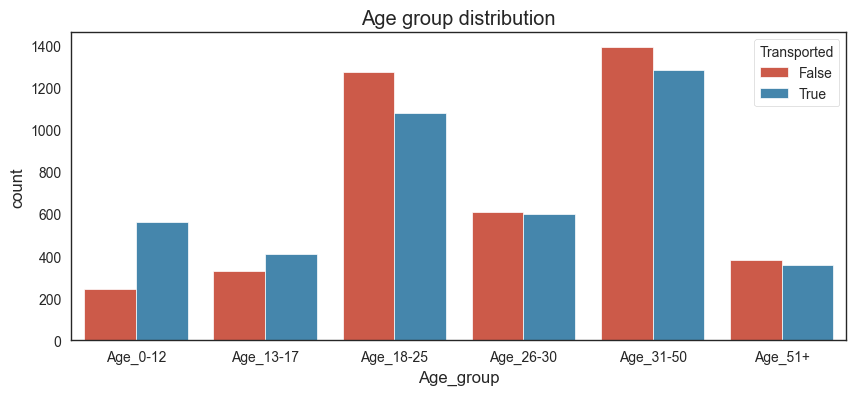

In [53]:
for dataset in data_cleaner: 
    dataset['Age_group']=np.nan # np.nan se usa para inicializar la columna Age_group con valores vacíos antes de asignar los grupos de edad, ya que al principio no tenemos esa información disponible.
    dataset.loc[dataset['Age']<=12,'Age_group']='Age_0-12'
    dataset.loc[(dataset['Age']>12) & (dataset['Age']<18),'Age_group']='Age_13-17'
    dataset.loc[(dataset['Age']>=18) & (dataset['Age']<=25),'Age_group']='Age_18-25'
    dataset.loc[(dataset['Age']>25) & (dataset['Age']<=30),'Age_group']='Age_26-30'
    dataset.loc[(dataset['Age']>30) & (dataset['Age']<=50),'Age_group']='Age_31-50'
    dataset.loc[dataset['Age']>50,'Age_group']='Age_51+'

# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=data1, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

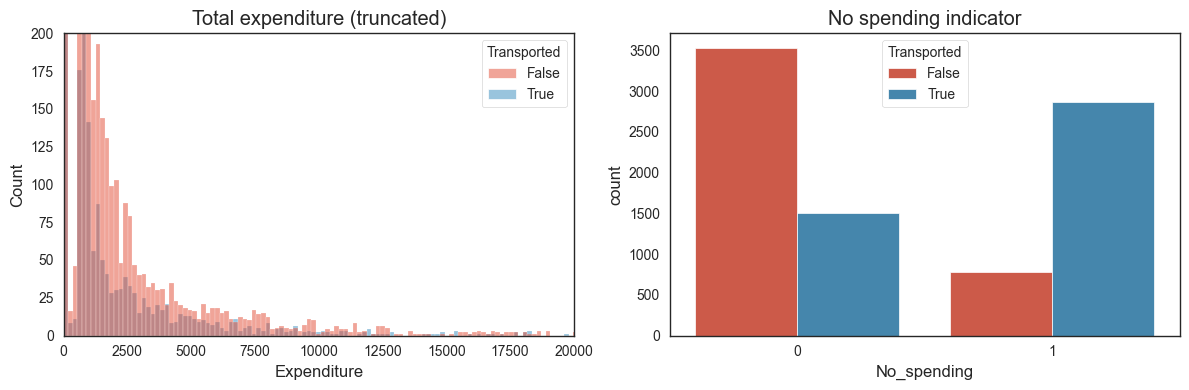

In [54]:
for dataset in data_cleaner: 
    dataset['Expenditure']=dataset[exp_feats].sum(axis=1)
    dataset['No_spending']=(dataset['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=data1, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=data1, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

Con base en esta visualización, podríamos concluir que, aunque el monto total de gasto no es un buen indicador por sí solo, la simple presencia o ausencia de gasto (No_spending) sí podría ser un predictor más relevante para determinar si un pasajero fue transportado o no. Esto es especialmente visible en la categoría de aquellos que no gastaron nada.

/Users/cash/Desktop/F5/Python/Machine_Learning/non-supervised-learning/env/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/cash/Desktop/F5/Python/Machine_Learning/non-supervised-learning/env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


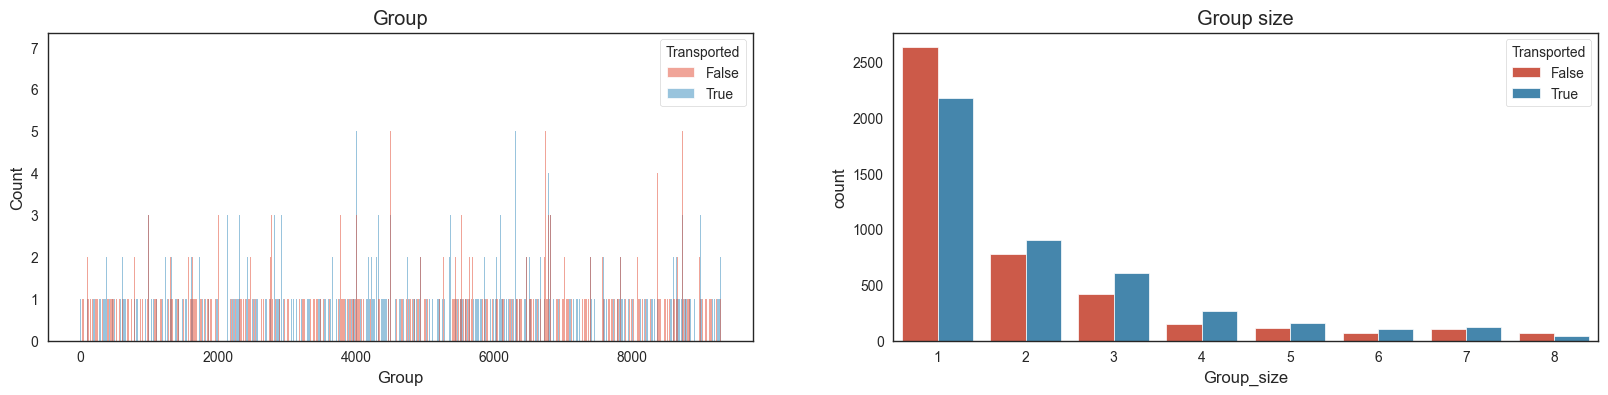

In [55]:
for dataset in data_cleaner: 
    dataset['Group'] = dataset['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    dataset['Group_size']=dataset['Group'].map(lambda x: dataset['Group'].value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=data1, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=data1, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

### plt.subplog(1,2,1)
pertenece a la librería matplotlib.pyplot y se utiliza para crear una cuadrícula de gráficos (subplots) en una única figura. Esta función organiza múltiples gráficos dentro de la misma ventana de visualización.

Desglose de los parámetros:
1: El primer parámetro indica cuántas filas de gráficos habrá en la cuadrícula. En este caso, es "1", lo que significa que habrá una fila de gráficos.
2: El segundo parámetro indica cuántas columnas habrá. Aquí es "2", por lo que habrá dos gráficos en esa única fila.
1: El tercer parámetro indica la posición del gráfico dentro de la cuadrícula. En este caso, "1" indica que el gráfico se colocará en la primera posición (esquina superior izquierda en una cuadrícula de 1x2).

### Lo que hace map
En este contexto, map toma cada valor de la columna Group, lo busca en la serie de conteo de Group.value_counts() (que te dice cuántos pasajeros hay en cada grupo), y devuelve ese conteo para cada fila. Este valor es lo que se almacena en la nueva columna Group_size.

El gráfico muestra 8 tamaños de grupo porque es la cantidad de grupos con ese tamaño específico en el conjunto de datos. Los pasajeros se agrupan por Group, y el tamaño de cada grupo (cuántos pasajeros pertenecen al mismo número de grupo) se muestra en la segunda gráfica.

En resumen:

**Group**: es el identificador numérico antes del guion bajo en el PassengerId.
**Group_size**: es el número de pasajeros con el mismo valor de Group.

La gráfica de la derecha muestra que la mayoría de los pasajeros están en grupos de tamaño 1 (es decir, grupos con un solo pasajero), y luego hay algunos grupos más grandes (hasta 8 pasajeros).
Esto podría ser útil para analizar si los pasajeros que viajan en grupos más grandes tienen más probabilidades de ser transportados (o no) en relación con los pasajeros solitarios.

In [56]:
# Cacular cuantos grupos hay
print('Number of groups in train set:', data1['Group'].nunique())
print('Numer of group_size in train set:', data1['Group_size'].nunique())

Number of groups in train set: 6217
Numer of group_size in train set: 8


(0.0, 3000.0)

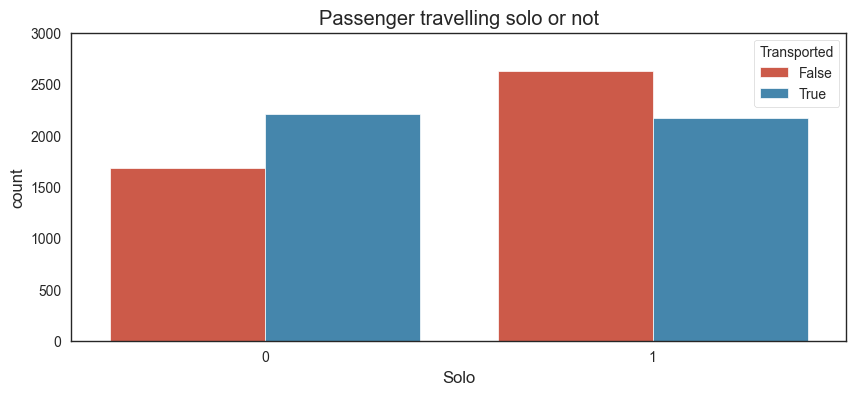

In [57]:
'''
We can't really use the Group feature in our models because it has too big of a cardinality (6217) and 
would explode the number of dimensions with one-hot encoding.

The Group size on the other hand should be a useful feature. In fact, we can compress the feature further by 
creating a 'Solo' column that tracks whether someone is travelling on their own or not. The figure on the right 
shows that group size=1 is less likely to be transported than group size>1.
'''


# # New feature
# data_raw['Solo']=(data_raw['Group_size']==1).astype(int)
# data_val['Solo']=(data_val['Group_size']==1).astype(int)

for dataset in data_cleaner: 
    dataset['Solo']=(dataset['Group_size']==1).astype(int)
    

# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=data1, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_16917/3305650904.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Cabin'].fillna('Z/9999/Z', inplace=True)
/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_16917/3305650904.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

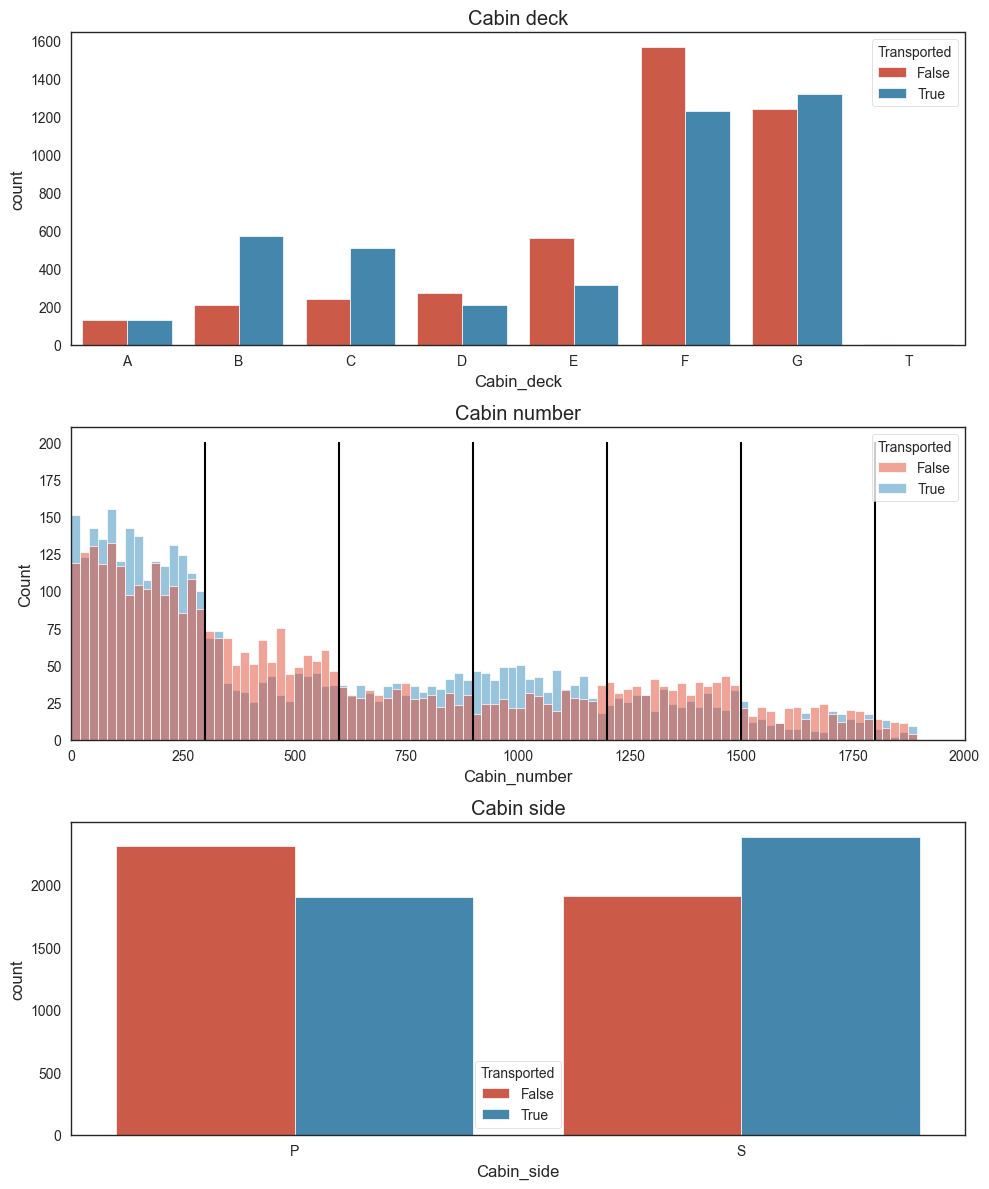

In [58]:
for dataset in data_cleaner: 
    # Replace NaN's with outliers for now (so we can split feature)
    dataset['Cabin'].fillna('Z/9999/Z', inplace=True)
    # New features
    dataset['Cabin_deck'] = dataset['Cabin'].apply(lambda x: x.split('/')[0])
    dataset['Cabin_number'] = dataset['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    dataset['Cabin_side'] = dataset['Cabin'].apply(lambda x: x.split('/')[2])
    
    # Put Nan's back in (we will fill these later)
    dataset.loc[dataset['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
    dataset.loc[dataset['Cabin_number']==9999, 'Cabin_number']=np.nan
    dataset.loc[dataset['Cabin_side']=='Z', 'Cabin_side']=np.nan
    
    # Drop Cabin (we don't need it anymore)
    dataset.drop('Cabin', axis=1, inplace=True) # el parámetro inplace=True indica que la operación de eliminación de la columna Cabin se realizará directamente en el DataFrame original sin crear una copia del mismo.


# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=data1, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=data1, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=data1, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

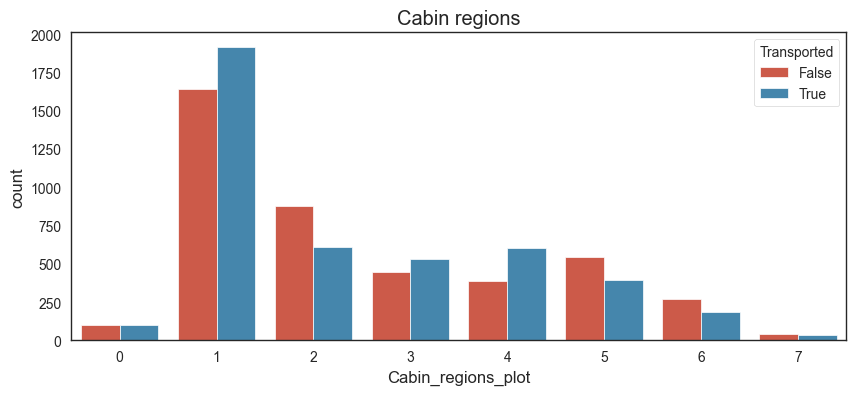

In [59]:
for dataset in data_cleaner:
    # New features - training set
    dataset['Cabin_region1']=(dataset['Cabin_number']<300).astype(int)   # one-hot encoding. Cada una de estas expresiones genera una serie de valores booleanos (True o False) al evaluar la condición (por ejemplo, si el número de cabina es menor que 300). Al convertir esta serie de valores booleanos a enteros con .astype(int), los True se convierten en 1 y los False en 0. Este proceso crea manualmente una codificación binaria (one-hot) donde:
        # 1 indica que el valor pertenece a esa región de cabina.
        # 0 indica que no pertenece a esa región.
    dataset['Cabin_region2']=((dataset['Cabin_number']>=300) & (dataset['Cabin_number']<600)).astype(int)
    dataset['Cabin_region3']=((dataset['Cabin_number']>=600) & (dataset['Cabin_number']<900)).astype(int)
    dataset['Cabin_region4']=((dataset['Cabin_number']>=900) & (dataset['Cabin_number']<1200)).astype(int)
    dataset['Cabin_region5']=((dataset['Cabin_number']>=1200) & (dataset['Cabin_number']<1500)).astype(int)
    dataset['Cabin_region6']=((dataset['Cabin_number']>=1500) & (dataset['Cabin_number']<1800)).astype(int)
    dataset['Cabin_region7']=(dataset['Cabin_number']>=1800).astype(int)

# Plot distribution of new features
plt.figure(figsize=(10,4))
data1['Cabin_regions_plot']=(data1['Cabin_region1']+2*data1['Cabin_region2']+3*data1['Cabin_region3']+4*data1['Cabin_region4']+5*data1['Cabin_region5']+6*data1['Cabin_region6']+7*data1['Cabin_region7']).astype(int)
sns.countplot(data=data1, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
data1.drop('Cabin_regions_plot', axis=1, inplace=True)

/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_16917/4271698127.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Name'].fillna('Unknown Unknown', inplace=True)
/var/folders/6l/xc4cvh3j3zj9b4f6zl1r0m100000gn/T/ipykernel_16917/4271698127.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

Text(0.5, 1.0, 'Family size')

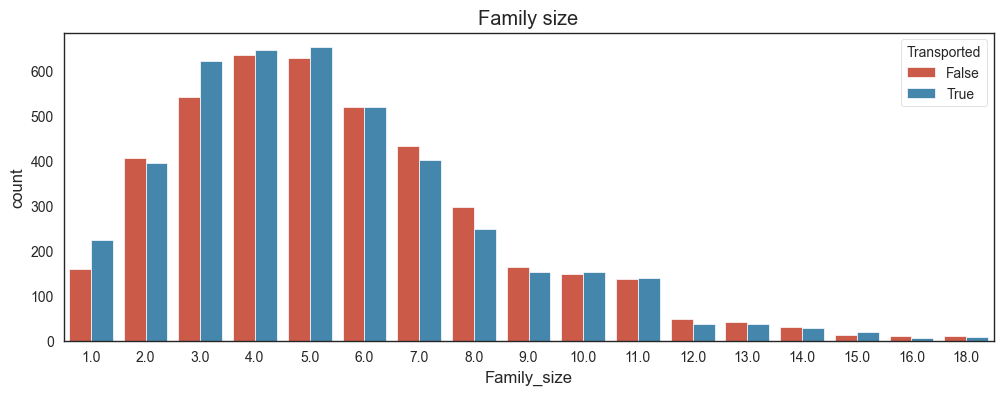

In [60]:
for dataset in data_cleaner:
    # Calculate family size from last name.
    # Replace NaN's with outliers for now (so we can split feature)
    dataset['Name'].fillna('Unknown Unknown', inplace=True)
    # New feature - Surname
    dataset['Surname']=dataset['Name'].str.split().str[-1] # toma el valor de la columna Name, lo divide en palabras usando el método .str.split(), y selecciona la última palabra con .str[-1].
    # New feature - Family size
    dataset['Family_size']=dataset['Surname'].map(lambda x: dataset['Surname'].value_counts()[x]) # La función lambda x toma cada apellido y lo mapea al valor que representa la cantidad de veces que ese apellido aparece en la columna. El resultado es el tamaño de la familia basado en cuántas personas comparten el mismo apellido.
    # Put Nan's back in (we will fill these later)
    dataset.loc[dataset['Surname']=='Unknown','Surname']=np.nan
    dataset.loc[dataset['Family_size']>100,'Family_size']=np.nan # si el tamaño de la familia es mayor a 100 (lo cual probablemente indica un error o un valor extremo), también lo reemplaza por NaN para evitar que estos valores anómalos afecten el análisis
    # Drop name (we don't need it anymore)
    dataset.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=data1, x='Family_size', hue='Transported')
plt.title('Family size')

In [61]:
data1['Transported'].astype(int) # convierte los valores de la columna Transported a enteros (int).

for dataset in data_cleaner:
    # Columns with missing values
    na_cols=dataset.columns[dataset.isna().any()].tolist() # dataset.isna().any() devuelve True para columnas que tienen al menos un valor faltante. tolist() convierte esa información en una lista de los nombres de las columnas con valores faltantes.
    mv=pd.DataFrame(dataset[na_cols].isna().sum(), columns=['Number_missing']) # Aquí se crea un DataFrame (mv) que contiene el número de valores faltantes en cada columna que fue identificada previamente. dataset[na_cols].isna().sum() cuenta cuántos valores faltantes (NaN) hay en cada una de las columnas de la lista na_cols, generando una serie que luego es convertida en un DataFrame, donde la columna es renombrada como 'Number_missing'.
    mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(dataset),2)
    print(mv, '\n')

              Number_missing  Percentage_missing
HomePlanet               201                2.31
CryoSleep                217                2.50
Destination              182                2.09
Age                      179                2.06
VIP                      203                2.34
RoomService              181                2.08
FoodCourt                183                2.11
ShoppingMall             208                2.39
Spa                      183                2.11
VRDeck                   188                2.16
Age_group                179                2.06
Cabin_deck               199                2.29
Cabin_number             199                2.29
Cabin_side               199                2.29
Surname                  200                2.30
Family_size              200                2.30 

              Number_missing  Percentage_missing
HomePlanet                87                2.03
CryoSleep                 93                2.17
Destination       

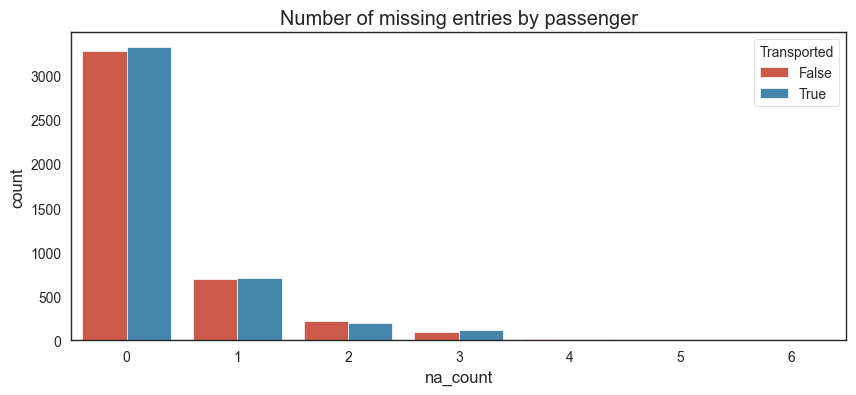

In [62]:
# Countplot of number of missing values by passenger
data1['na_count']=data1.isna().sum(axis=1) # data1.isna(): método devuelve una versión del DataFrame con valores booleanos (True si hay un NaN, False si no) para todas las columnas y filas. sum(axis=1): Suma los valores True en cada fila (es decir, el número de valores faltantes) a lo largo del eje 1, que representa las filas. data1['na_count']: Guarda el resultado en una nueva columna llamada 'na_count', que contiene el número total de valores faltantes (NaN) para cada pasajero (cada fila).
plt.figure(figsize=(10,4))
sns.countplot(data=data1, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
data1.drop('na_count', axis=1, inplace=True)

1. Valores faltantes en los datos:
    - Solo el 2% de los datos totales están faltando, lo que significa que no es una cantidad crítica de valores faltantes.

    - Sin embargo, 25% de los pasajeros tienen al menos un valor faltante, lo cual es importante. Esto indica que los valores faltantes están distribuidos en varias filas y no concentrados en unas pocas.

2. Independencia de los valores faltantes respecto al objetivo (Transported):
La frase "Missing values are independent of the target" sugiere que no hay una relación directa entre los pasajeros transportados (Transported) y la presencia de valores faltantes. Esto se deduce porque, en el análisis, los pasajeros transportados y no transportados no tienen un patrón significativo en la cantidad de valores faltantes que pueda vincularse con el resultado de la variable objetivo.

3. Distribución de valores faltantes:
Los valores faltantes están "aislados", lo que significa que no hay un patrón evidente donde muchas características tengan valores faltantes al mismo tiempo para un mismo pasajero. Es decir, si un pasajero tiene valores faltantes, generalmente será en una o dos características, no en la mayoría de ellas.
Este punto sugiere que, en lugar de descartar filas completas (lo que eliminaría muchos datos útiles), sería más apropiado rellenar los valores faltantes utilizando técnicas de imputación.

4. PassengerId no tiene valores faltantes:
PassengerId es la única característica que no tiene ningún valor faltante. Esto es útil porque se puede usar para imputar o estimar otros valores faltantes. Si se detecta alguna relación entre el PassengerId y otras características, podrías usarla para llenar esos huecos de manera lógica y consistente (por ejemplo, agrupando pasajeros según su ID y características asociadas).

### Insight (Conclusión):
No tiene sentido eliminar las filas con valores faltantes ya que muchos pasajeros tienen solo uno o pocos valores faltantes.

Dado que los valores faltantes están distribuidos en filas específicas y no se encuentran en un solo bloque, rellenar los valores faltantes tiene más sentido. Se pueden usar estrategias basadas en las características que no tienen valores faltantes (como PassengerId), siempre que se identifique alguna relación que permita hacer imputaciones razonables.

Además, si se encuentra una relación entre PassengerId y otras características, podría usarse para inferir los valores faltantes basándose en patrones observados entre pasajeros con IDs similares o relacionados.

### Resumen:
La conclusión sugiere que es más práctico rellenar los valores faltantes porque no son muchos, y la mayoría de los pasajeros tienen solo uno o pocos valores faltantes. Dado que el PassengerId no tiene valores faltantes, se podría usar como base para estimar los valores perdidos si se identifica alguna relación entre el ID y otras características.

## Estrategia de manejo de valores faltantes:
La estrategia sugiere dos enfoques generales para tratar con los valores faltantes:

### Estrategia estándar (Mediana y Moda):
**Mediana para características continuas**: La mediana es una buena opción para reemplazar valores faltantes en variables numéricas porque no se ve afectada por valores atípicos, a diferencia de la media. Por ejemplo, si tienes la edad de pasajeros y algunas entradas faltantes, podrías rellenarlas con la mediana de las edades.

**Moda para características categóricas**: Para las variables categóricas (como "Cabin" o "Destination"), se usa la moda, que es el valor más frecuente. Por ejemplo, si la mayoría de los pasajeros están en el destino "Mars", puedes usar "Mars" para rellenar los valores faltantes.

Esta estrategia funciona razonablemente bien cuando no hay muchos valores faltantes o cuando no hay patrones evidentes en los datos faltantes.

### Estrategia avanzada (Buscar patrones):
La conclusión se refiere a que, en lugar de utilizar la simple imputación de mediana o moda, se puede maximizar la precisión del modelo buscando patrones entre las características faltantes y otras características. Esto implica mirar las distribuciones conjuntas de diferentes características y observar si existe una relación que pueda ayudar a predecir los valores faltantes.

Por ejemplo, si un grupo de pasajeros pertenece a la misma familia (usando un apellido o PassengerId), es posible que todos compartan características comunes, como el mismo destino o cabina. Entonces, si algunos pasajeros de ese grupo tienen un valor faltante para el destino, pero la mayoría no, podrías rellenar los valores faltantes basándote en lo que tienen los otros pasajeros del grupo.

El ejemplo que menciona grupos familiares es clave aquí: Si se observa que pasajeros con el mismo PassengerId o apellido pertenecen a una misma familia y tienen características similares, puedes usar esa información para hacer imputaciones más precisas.

En resumen, la estrategia avanzada busca relacionar características faltantes con otras características para hacer imputaciones más informadas, en lugar de simplemente usar la mediana o la moda sin tener en cuenta la estructura de los datos.

Este código que mostramos a continuación es parte de una estrategia avanzada para rellenar los valores faltantes en la columna HomePlanet basándose en la agrupación de pasajeros que están en el mismo grupo (Group) y que ya tienen un valor conocido para HomePlanet.

In [63]:
for dataset in data_cleaner:
    GHP_gb=dataset.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0) # Este paso agrupa los datos por las columnas Group (grupo al que pertenece el pasajero) y HomePlanet (planeta de origen del pasajero). Luego, usa la función size() para contar cuántos pasajeros hay en cada combinación de grupo y planeta, y unstack() transforma la agrupación en una tabla con Group como filas y HomePlanet como columnas. fillna(0): Cualquier valor faltante en la tabla se rellena con 0, lo que significa que en ese grupo no había pasajeros registrados en ese planeta.

    # Missing values before
    HP_bef=dataset['HomePlanet'].isna().sum() # Este código cuenta cuántos valores faltantes (NaN) hay en la columna HomePlanet antes de proceder con el relleno. Esto se hace usando isna().sum(), que cuenta el número total de valores NaN.

    # Passengers with missing HomePlanet and in a group with known HomePlanet
    GHP_index=dataset[dataset['HomePlanet'].isna()][(dataset[dataset['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index # identifica a los pasajeros que no tienen registrado su HomePlanet pero pertenecen a un grupo donde otros pasajeros tienen ese dato. La idea es que si la mayoría de los pasajeros de un grupo pertenecen a un planeta específico, es razonable suponer que el pasajero faltante también pertenece a ese mismo planeta. dataset['HomePlanet'].isna(): Encuentra las filas donde HomePlanet es NaN. isin(GHP_gb.index): Verifica si el grupo de esos pasajeros está en el índice de la tabla creada (GHP_gb), es decir, si tiene datos de HomePlanet para otros miembros del grupo. index: Devuelve los índices de estos pasajeros, los cuales serán utilizados para rellenar los valores faltantes.

    # Fill corresponding missing values
    dataset.loc[GHP_index,'HomePlanet']=dataset.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x]) # usa los índices identificados anteriormente (GHP_index) para rellenar los valores faltantes de HomePlanet: map(): Para cada pasajero cuyo HomePlanet falta, busca su grupo (Group) y asigna el planeta más frecuente para ese grupo en GHP_gb. idxmax(axis=1): Encuentra el planeta más frecuente por grupo (es decir, el planeta con el valor más alto en GHP_gb para cada fila).

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',dataset['HomePlanet'].isna().sum())

# El objetivo es rellenar los valores faltantes con la mayor precisión posible, utilizando la suposición de que los pasajeros del mismo grupo tienden a provenir del mismo planeta. Esta es una estrategia eficaz cuando los datos están agrupados y hay coherencia dentro de cada grupo.

# We managed to fill 131 values with 100% confidence but we are not finished yet.

#HomePlanet missing values before: 201
#HomePlanet missing values after: 111
#HomePlanet missing values before: 87
#HomePlanet missing values after: 46


El siguiente código es parte de una estrategia para rellenar los valores faltantes de la columna HomePlanet en función del deck (piso o cubierta) en el que se encuentran los pasajeros en sus cabinas. Se basa en la suposición de que los pasajeros de ciertas cubiertas provienen de planetas específicos, lo que permite deducir su planeta de origen en ausencia de datos directos

In [64]:
'''
Notes:

Passengers on decks A, B, C or T came from Europa.
Passengers on deck G came from Earth.
Passengers on decks D, E or F came from multiple planets.
'''

for dataset in data_cleaner:
    # Missing values before
    HP_bef=dataset['HomePlanet'].isna().sum()

    # Decks A, B, C or T came from Europa
    dataset.loc[(dataset['HomePlanet'].isna()) & (dataset['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa' # se seleccionan los pasajeros que: 1. Tienen valores faltantes en HomePlanet (dataset['HomePlanet'].isna()). 2. Están en los decks A, B, C o T (dataset['Cabin_deck'].isin(['A', 'B', 'C', 'T'])). 
    # Para estos pasajeros, el código asigna el valor 'Europa' a su HomePlanet.

    # Deck G came from Earth
    dataset.loc[(dataset['HomePlanet'].isna()) & (dataset['Cabin_deck']=='G'), 'HomePlanet']='Earth'

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',dataset['HomePlanet'].isna().sum())

#HomePlanet missing values before: 111
#HomePlanet missing values after: 63
#HomePlanet missing values before: 46
#HomePlanet missing values after: 31
